# Research about the vision model
## Introduction
The vision model has to be chosen carefully, it's the vision model that will enable to the model to predict the future of the race.  
The vision model will be a pre-trained model but it will be fine-tuned.
The vision model will extract features from the images and the features will be passed to the Critic and the Actor.
All predictions have to be made in real-time, so the vision model has to be fast.

## Pre-selection
According to the my research, the following models are my candidates:
- ResNet
- EfficientNet

We will compute benchmarks in terms of speed on the machine that will be used for training and inference.



## Speed benchmark

My major concern is the speed of inference, the race has to be predicted in real-time. The training time is not a concern because the model will be trained offline but a too long training time can waste time.

I consider the model has to take less than 50ms to make a prediction. To let 50 ms for the rest of the model and then have a prediction every 100ms so 10 predictions per second.

In [2]:
import torch
import torchvision.models as models
import time
from torchvision.transforms import Normalize, ToTensor, Resize
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
if torch.cuda.is_available():
    print("CUDA est disponible! :)")
    print("Nombre de GPU détectés:", torch.cuda.device_count())
    print("Nom du GPU:", torch.cuda.get_device_name(0))
else:
    print("CUDA n'est toujours pas disponible. :(")


CUDA est disponible! :)
Nombre de GPU détectés: 1
Nom du GPU: NVIDIA GeForce RTX 4060


In [4]:
def generate_random_input():
    img = Image.fromarray(np.random.randint(0, 256, (600, 600, 3), dtype=np.uint8))
    transform = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    img = Resize((600, 600))(ToTensor()(img))
    return transform(img).unsqueeze(0)

In [5]:
def benchmark_model(model_name, load_model, num_runs=50):
    model = load_model(model_name)
    input_tensor = generate_random_input()
    if torch.cuda.is_available():
        model = model.cuda()
        input_tensor = input_tensor.cuda()

    # Cuda caching
    with torch.no_grad():
        model(input_tensor)

    start_time = time.time()
    with torch.no_grad():
        for _ in range(num_runs):
            model(input_tensor)
    total_time = time.time() - start_time
    return total_time / num_runs

In [6]:
num_runs = 1000

### EfficientNet
For the speed benchmark we will consider, the EfficientNetB1, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7.


In [7]:
def load_efficientnet(model_name):
    if model_name == "efficientnet_b4":
        model = models.efficientnet_b4(weights="EfficientNet_B4_Weights.DEFAULT")
    elif model_name == "efficientnet_b3":
        model = models.efficientnet_b3(weights="EfficientNet_B3_Weights.DEFAULT")
    elif model_name == "efficientnet_b1":
        model = models.efficientnet_b1(weights="EfficientNet_B1_Weights.DEFAULT")
    elif model_name == "efficientnet_b2":
        model = models.efficientnet_b2(weights="EfficientNet_B2_Weights.DEFAULT")
    elif model_name == "efficientnet_b5":
        model = models.efficientnet_b5(weights="EfficientNet_B5_Weights.DEFAULT")
    elif model_name == "efficientnet_b6":
        model = models.efficientnet_b6(weights="EfficientNet_B6_Weights.DEFAULT")
    elif model_name == "efficientnet_b7":
        model = models.efficientnet_b7(weights="EfficientNet_B7_Weights.DEFAULT")
    else:
        raise ValueError("Not a valid model name")
    model.eval()
    return model

In [8]:
# Benchmarking
efficientnet_benchmarks = {}
for model_name in  ["efficientnet_b1", "efficientnet_b2", "efficientnet_b3", "efficientnet_b4", "efficientnet_b5", "efficientnet_b6", "efficientnet_b7"]:
    duration = benchmark_model(model_name, load_efficientnet, num_runs)
    efficientnet_benchmarks[model_name] = duration
    print(f"Temps moyen pour {model_name}: {duration:.4f} secondes")

Temps moyen pour efficientnet_b1: 0.0178 secondes
Temps moyen pour efficientnet_b2: 0.0180 secondes
Temps moyen pour efficientnet_b3: 0.0199 secondes
Temps moyen pour efficientnet_b4: 0.0237 secondes
Temps moyen pour efficientnet_b5: 0.0277 secondes
Temps moyen pour efficientnet_b6: 0.0298 secondes
Temps moyen pour efficientnet_b7: 0.0386 secondes


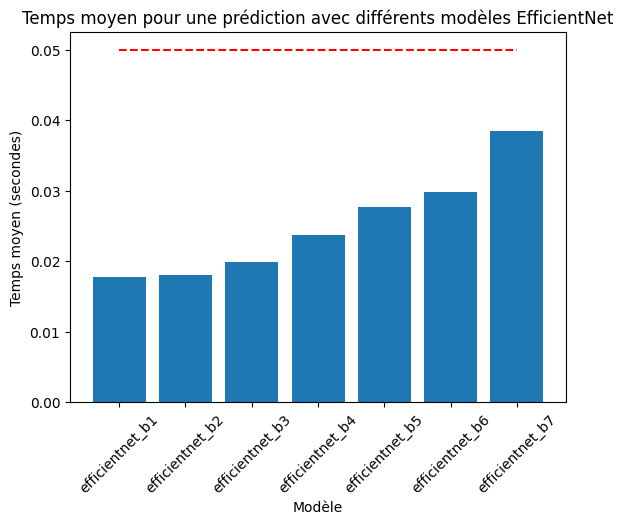

In [9]:
plt.bar(efficientnet_benchmarks.keys(), efficientnet_benchmarks.values())
plt.ylabel("Temps moyen (secondes)")
plt.xlabel("Modèle")
plt.title("Temps moyen pour une prédiction avec différents modèles EfficientNet")
plt.xticks(rotation=45)

plt.plot([0, len(efficientnet_benchmarks)-1], [0.05, 0.05], color='red', linestyle='--')

### Resnet
For the speed benchmark we will consider, the ResNet18, ResNet34, ResNet50, ResNet101, ResNet152.

In [10]:
def load_resnet(model_name):
    if model_name == "resnet18":
        model = models.resnet18(weights="ResNet18_Weights.DEFAULT")
    elif model_name == "resnet34":
        model = models.resnet34(weights="ResNet34_Weights.DEFAULT")
    elif model_name == "resnet50":
        model = models.resnet50(weights="ResNet50_Weights.DEFAULT")
    elif model_name == "resnet101":
        model = models.resnet101(weights="ResNet101_Weights.DEFAULT")
    elif model_name == "resnet152":
        model = models.resnet152(weights="ResNet152_Weights.DEFAULT")
    model.eval()
    return model

In [11]:
# Benchmarking
resnet_benchmarks = {}
for model_name in  ["resnet18", "resnet34", "resnet50", "resnet101", "resnet152"]:
    duration = benchmark_model(model_name, load_resnet, num_runs)
    resnet_benchmarks[model_name] = duration
    print(f"Temps moyen pour {model_name}: {duration:.4f} secondes")

Temps moyen pour resnet18: 0.0040 secondes
Temps moyen pour resnet34: 0.0070 secondes
Temps moyen pour resnet50: 0.0107 secondes
Temps moyen pour resnet101: 0.0178 secondes
Temps moyen pour resnet152: 0.0255 secondes


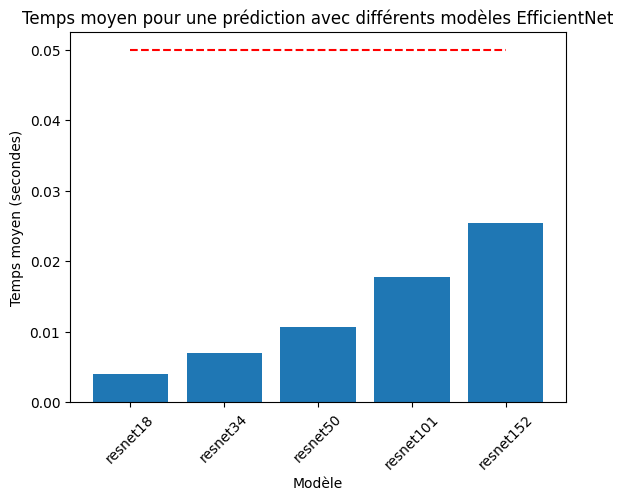

In [12]:
plt.bar(resnet_benchmarks.keys(), resnet_benchmarks.values())
plt.ylabel("Temps moyen (secondes)")
plt.xlabel("Modèle")
plt.title("Temps moyen pour une prédiction avec différents modèles EfficientNet")
plt.xticks(rotation=45)

plt.plot([0, len(resnet_benchmarks)-1], [0.05, 0.05], color='red', linestyle='--')

## Results

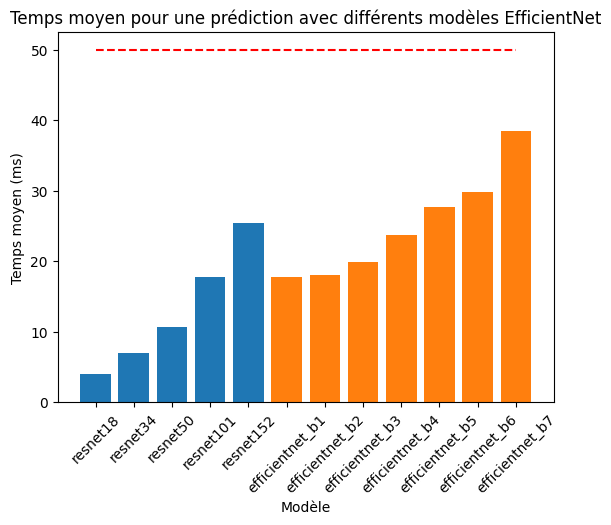

In [13]:
plt.bar(resnet_benchmarks.keys(), np.array(list(resnet_benchmarks.values()))*1000.0)
plt.bar(efficientnet_benchmarks.keys(), np.array(list(efficientnet_benchmarks.values()))*1000.0)
plt.ylabel("Temps moyen (ms)")
plt.xlabel("Modèle")
plt.title("Temps moyen pour une prédiction avec différents modèles EfficientNet")
plt.xticks(rotation=45)

plt.plot([0, len(resnet_benchmarks) + len(efficientnet_benchmarks)-1], [50, 50], color='red', linestyle='--')

Regarding the speed benchmarks, the ResNet can be compare with efficientNetB1 or efficientNetB2. Now if we consider the accuracy, 

![Results](https://gdude.de/blog/assets/images/Revisiting-Resnets/speed_acc_pareto_curve_zoomed-in.png)

```latex
@misc{tan2020efficientnet,
      title={EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks}, 
      author={Mingxing Tan and Quoc V. Le},
      year={2020},
      eprint={1905.11946},
      archivePrefix={arXiv},
      primaryClass={cs.LG}
}
```